In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Deleting the "customerID" column as it does not influence the customer churn
data.drop(columns=["customerID"],inplace=True)

In [7]:
for col in data.columns:
    if data[col].dtype=="object":
        print(data[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

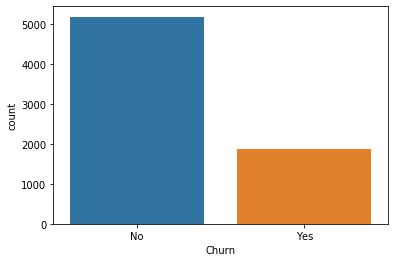

In [8]:
# Analyzing number of customer churns
sns.countplot(x="Churn",data=data)
# The dataset is imbalanced hence auc roc curve should be the metric

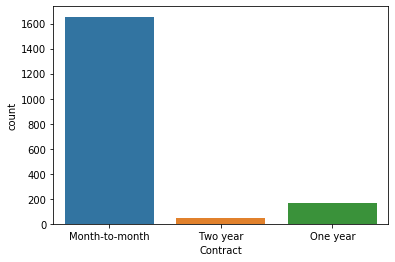

In [9]:
# Analyzing the customer churn by contract type
sns.countplot(x="Contract",data=data.loc[data["Churn"]=="Yes"])
plt.show()
# Customers with "Month to Month" contracts have higher churning rates

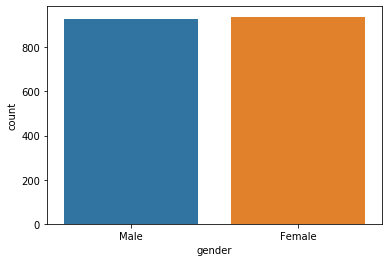

In [10]:
# Analyzing the customer churn by gender
sns.countplot(x="gender",data=data.loc[data["Churn"]=="Yes"])
plt.show()
# Male and female customers are equal when it comes to customer churns

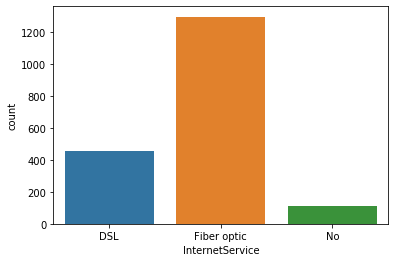

In [11]:
# Customer churn by "InternetService" 
sns.countplot(x="InternetService",data=data.loc[data["Churn"]=="Yes"])
plt.show()
# Customers with fibre optic internet service have higher churning rates

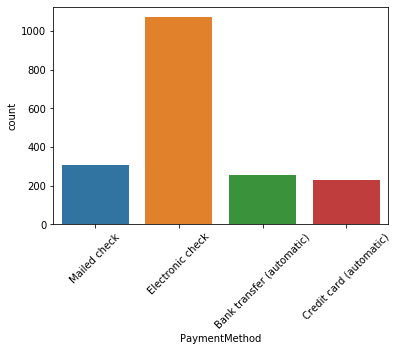

In [12]:
# Customer churning on the basis of "PaymentMethod"
plt.xticks(rotation=45)
sns.countplot(x="PaymentMethod",data=data.loc[data["Churn"]=="Yes"])
plt.show()
# Customers paying bills through electronic check have churning rates. This mmight be due to the problems faced by customers by paying bills through electronic check

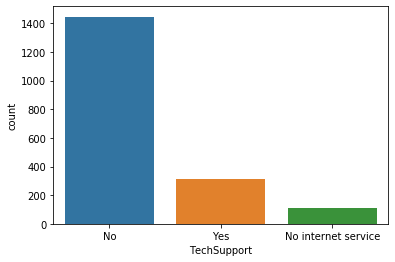

In [13]:
# Analyzing the count of customers churn on the basis "Tech Support"
sns.countplot(x="TechSupport",data=data.loc[data["Churn"]=="Yes"])
plt.show()
# Higher churning was seen in customers who did not recieve the technical support

In [14]:
x = data.drop(columns=['Churn'])
y = data[['Churn']]

In [15]:
# There are categorical values in the dataset. Hence, using one hot encoding
x=pd.get_dummies(x,drop_first=True)

In [16]:
x

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [18]:
# Using Logistic regression
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42, test_size=0.20, stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lr=LogisticRegression()
lr.fit(x_train,y_train)
predictlry=lr.predict(x_test)
print('Maximum roc_auc score is :', roc_auc_score(y_test,predictlry))

Maximum roc_auc score is : 0.7446498230385699


In [19]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for roc_auc score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for roc_auc score is: 0.8446291334345875
Standard deviation in roc_auc score is:  0.01064607514212553


In [20]:
# Using Decision Tree Classifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42, test_size=0.20, stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predictdtcy=dtc.predict(x_test)
print('Maximum roc_auc score is :', roc_auc_score(y_test,predictdtcy))

Maximum roc_auc score is : 0.6895683174455552


In [21]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.6761997294609834
Standard deviation in roc_auc score is:  0.011180948828800859


In [24]:
# Using KNN
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42, test_size=0.20, stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
predictknny=knn.predict(x_test)
print('Maximum roc_auc score is :', roc_auc_score(y_test,predictknny))

Maximum roc_auc score is : 0.691756439071017


In [23]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for KNN is:', cross_val_score(knn,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for KNN is: 0.7803370374437033
Standard deviation in roc_auc score is:  0.010484506729620818


In [25]:
# Using RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42, test_size=0.20, stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
predictrfcy=rfc.predict(x_test)
print('Maximum roc_auc score is :', roc_auc_score(y_test,predictrfcy))

Maximum roc_auc score is : 0.6733912010126843


In [26]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Random Forest Classifier is: 0.7973038079204546
Standard deviation in roc_auc score is:  0.011635252860960447


In [27]:
# Among all the models, Logistic Regression is the best performing model
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 19,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lr=LogisticRegression()
lr.fit(x_train,y_train)
predictlry=lr.predict(x_test)
print('classification_report \n', classification_report(y_test,predictlry))
print('Confusion matrix \n', confusion_matrix(y_test,predictlry))

classification_report 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1035
           1       0.56      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Confusion matrix 
 [[817 218]
 [102 272]]


In [28]:
# Saving the Logistic regression model
from sklearn.externals import joblib 
joblib.dump(lr, 'Customer_churn_lr.pkl')

['Customer_churn_lr.pkl']